In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
import sys
import os

# Add the directory containing the module to the system path
module_path = os.path.abspath(os.path.join('C:\\Users\\samue\\OneDrive\\AIML\\HS2024\\Data Sicence Projekt\\HSLU_DSPRO1_TrafficStatus\\data'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import the module
import DataEngineeringLibrary as dlib

In [3]:
# Load the data form seperate dictionary, because the data is too big to load onto github
# Dataload restricted to 1 million rows, because of speed and memory issues
# Just for testing purposes
dataframeLondonUTD19 = dlib.loadData(path=r"C:\Users\samue\OneDrive\AIML\HS2024\Data Sicence Projekt\Data\London_UTD19.csv", nrows=1000000)
dataframeLondonUTD19.head()

,day,interval,detid,flow,occ,error,city,speed
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,0.0,london,NaN
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,0.0,london,NaN
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,0.0,london,NaN
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,0.0,london,NaN
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,0.0,london,NaN


In [4]:
# Drop the error column, because it is not needed
dataframeLondonUTD19 = dlib.preprocess_dataframe(dataframeLondonUTD19)
dataframeLondonUTD19.head()

,day,interval,detid,flow,occ,city,weekday
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london,Saturday
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london,Saturday
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london,Saturday
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london,Saturday
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london,Saturday


In [5]:
#Calculate the speed using the formula speed = flow / occupancy
dataframeLondonUTD19 = dlib.calculate_traffic_speed(dataframeLondonUTD19)
dataframeLondonUTD19.head()

,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london,Saturday,4.08
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london,Saturday,8.16
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london,Saturday,8.46
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london,Saturday,4.90
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london,Saturday,3.48


In [6]:
dataframeLondonUTD19 = dlib.drop_outliers(dataframeLondonUTD19, column='occ', group_by_detid=True)
dataframeLondonUTD19.head()

,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-16,0,CNTR_N00/005x1,840.0,0.110000,london,Saturday,92.400000
1,2015-05-16,300,CNTR_N00/005x1,564.0,0.096667,london,Saturday,54.519992
2,2015-05-16,600,CNTR_N00/005x1,468.0,0.068333,london,Saturday,31.980000
3,2015-05-16,900,CNTR_N00/005x1,816.0,0.104167,london,Saturday,84.999999
4,2015-05-16,1200,CNTR_N00/005x1,864.0,0.110000,london,Saturday,95.040000


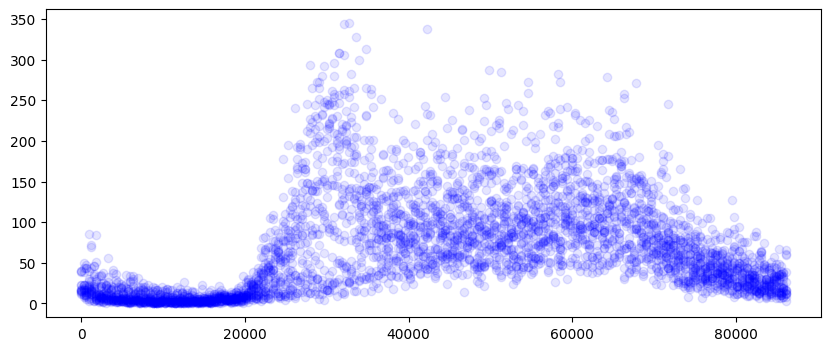

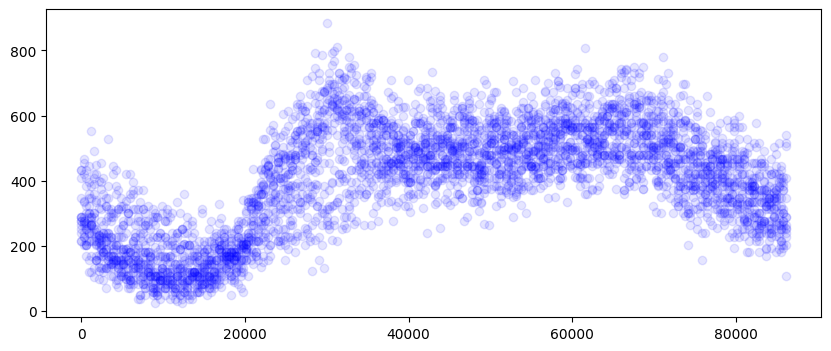

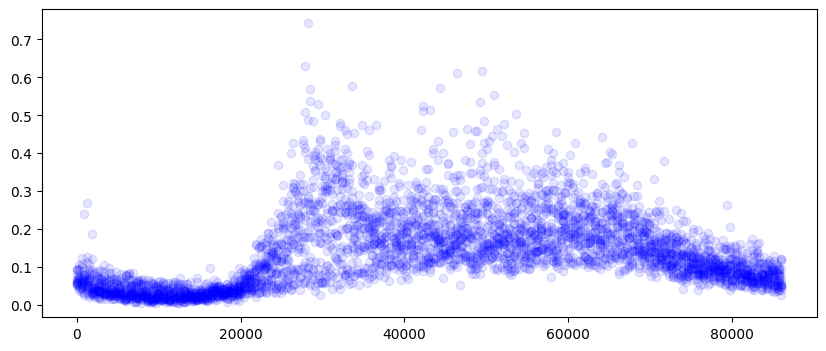

In [7]:
#Plot the speed, traffic and occ of a random detector
dataframeDetector = dataframeLondonUTD19[dataframeLondonUTD19['detid'] == 'NORT_N03/191x1']
plt.figure(figsize=(10, 4))
plt.scatter(dataframeDetector['interval'], dataframeDetector['traffic'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframeDetector['interval'], dataframeDetector['flow'], alpha=0.1, color='blue')                                  
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframeDetector['interval'], dataframeDetector['occ'], alpha=0.1, color='blue')
plt.show()

In [6]:
# select a random detector
unique_detectors = dataframeLondonUTD19['detid'].unique()
random_detector = pd.Series(unique_detectors).sample(1).iloc[0]
dataframe_random_detector = dataframeLondonUTD19[dataframeLondonUTD19['detid'] == random_detector]
print(f"Selected detector: {random_detector}")
dataframe_random_detector.head()

Selected detector: CNTR_N12/003x1


,day,interval,detid,flow,occ,city,weekday,traffic
786866,2015-05-16,0,CNTR_N12/003x1,876.0,0.250000,london,Saturday,219.000000
786867,2015-05-16,300,CNTR_N12/003x1,924.0,0.189167,london,Saturday,174.789994
786868,2015-05-16,600,CNTR_N12/003x1,744.0,0.154167,london,Saturday,114.700005
786869,2015-05-16,900,CNTR_N12/003x1,792.0,0.176667,london,Saturday,139.919995
786870,2015-05-16,1200,CNTR_N12/003x1,816.0,0.282500,london,Saturday,230.520000


Special random detectors 
- EAST_N17/121b1
- CNTR_N01/067k1

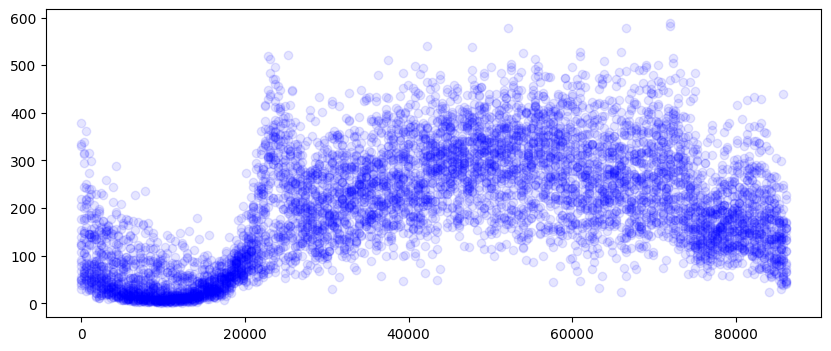

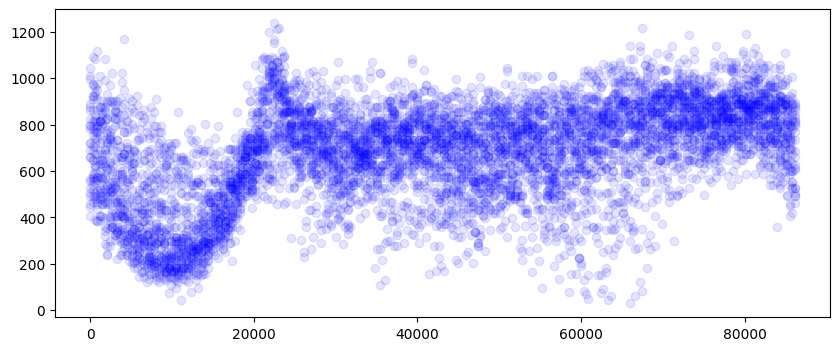

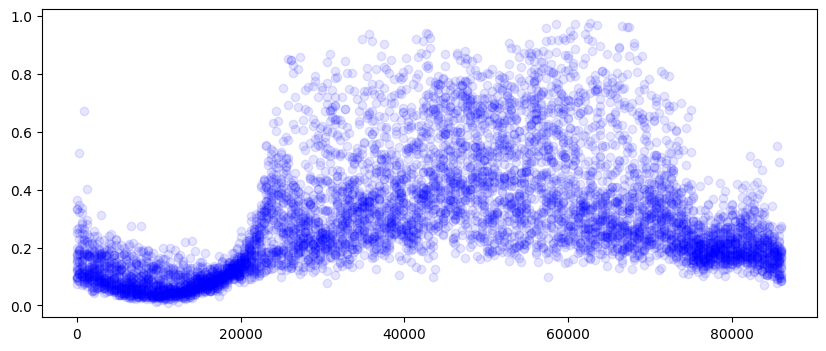

In [7]:
#Plot the speed, traffic and occ of a random detector
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_detector['interval'], dataframe_random_detector['traffic'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_detector['interval'], dataframe_random_detector['flow'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_detector['interval'], dataframe_random_detector['occ'], alpha=0.1, color='blue')
plt.show()

In [20]:
# Select a random day
unique_days = dataframe_random_detector['weekday'].unique()
random_day = pd.Series(unique_days).sample(1).iloc[0]
dataframe_random_day = dataframe_random_detector[dataframe_random_detector['weekday'] == random_day]
print(f"Selected day: {random_day}")
dataframe_random_day.head()

Selected day: Wednesday


,day,interval,detid,flow,occ,city,weekday,traffic
215103,2015-05-20,0,CNTR_N01/067k1,408.0,0.334167,london,Wednesday,136.339997
215104,2015-05-20,300,CNTR_N01/067k1,384.0,0.341667,london,Wednesday,131.200000
215105,2015-05-20,600,CNTR_N01/067k1,396.0,0.224167,london,Wednesday,88.769995
215106,2015-05-20,900,CNTR_N01/067k1,384.0,0.354167,london,Wednesday,136.000013
215107,2015-05-20,1200,CNTR_N01/067k1,372.0,0.250000,london,Wednesday,93.000000


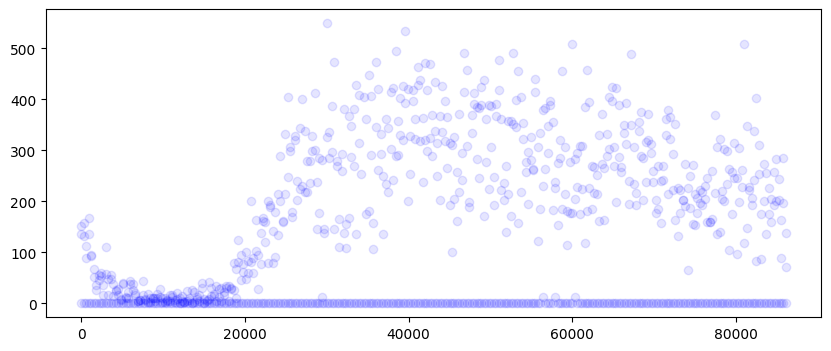

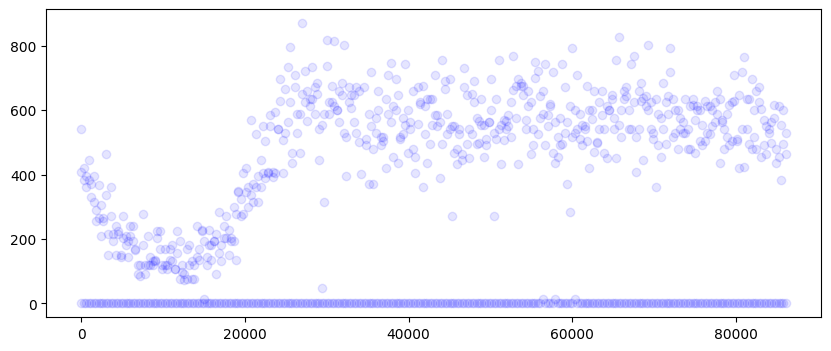

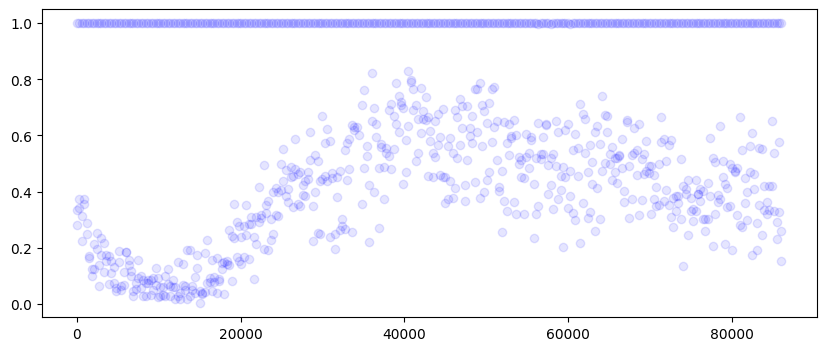

In [21]:
#Plot the speed, traffic an occ of a random detector on a random day
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_day['interval'], dataframe_random_day['traffic'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_day['interval'], dataframe_random_day['flow'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_day['interval'], dataframe_random_day['occ'], alpha=0.1, color='blue')
plt.show()

In [19]:
#Detect anomalies for every detector
def detect_anomalies(df):
    df = df.groupby('detid')['traffic'].mean().reset_index()
    Q1 = df['traffic'].quantile(0.25)
    Q3 = df['traffic'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    
    # Identify anomalies
    anomalies = df[(df['traffic'] < lower_bound) | (df['traffic'] > upper_bound)]
    
    # Return unique detid values where anomalies are detected
    return anomalies['detid'].unique()

In [46]:
# Filter the DataFrame to clip outliers
# Clip means setting the values outside the bounds to the bounds
# This is done to make the data more readable
dataframeLondonUTD19 = dlib.clip_outliers(dataframeLondonUTD19,column='traffic', group_by_detid=True)
print(dataframeLondonUTD19.head())

         day  interval           detid   flow       occ    city   weekday  \
0 2015-05-16         0  EAST_N04/161x1  144.0  0.028333  london  Saturday   
1 2015-05-16       300  EAST_N04/161x1  204.0  0.040000  london  Saturday   
2 2015-05-16       600  EAST_N04/161x1  216.0  0.039167  london  Saturday   
3 2015-05-16       900  EAST_N04/161x1  168.0  0.029167  london  Saturday   
4 2015-05-16      1200  EAST_N04/161x1  144.0  0.024167  london  Saturday   

   traffic  
0     4.08  
1     8.16  
2     8.46  
3     4.90  
4     3.48  
                            day  interval           detid   flow       occ  \
detid                                                                        
CNTR_N00/005x1 97786 2015-05-16         0  CNTR_N00/005x1  840.0  0.110000   
               97787 2015-05-16       300  CNTR_N00/005x1  564.0  0.096667   
               97788 2015-05-16       600  CNTR_N00/005x1  468.0  0.068333   
               97789 2015-05-16       900  CNTR_N00/005x1  816.0  0.1

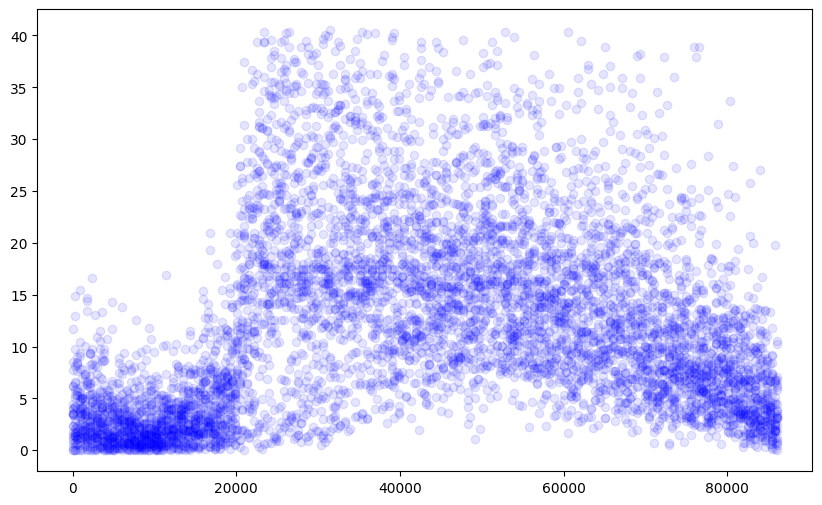

In [18]:
#plot for one detector
dataframeEAST_N04 = dataframeLondonUTD19[dataframeLondonUTD19['detid'] == 'EAST_N04/161x1']
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['traffic'], alpha=0.1, color='blue')
plt.show()

In [19]:
#plt.figure(figsize=(10, 6))
#plt.scatter(dataframeLondonUTD19['interval'], dataframeLondonUTD19['traffic'], alpha=0.01, color='blue')
#plt.show()

Different value for every detector issue

In [20]:
dataLondonDetectors = loadData(path=r"C:\Users\samue\OneDrive\AIML\HS2024\Data Sicence Projekt\Data\London_detectors.csv")
dataframeLondonDetectors = pd.DataFrame(dataLondonDetectors)
dataframeLondonDetectors.head()

,detid,length,pos,fclass,road,limit,citycode,lanes,linkid,long,lat
0,EAST_N04/161x1,0.303585,0.261157,secondary,Homerton Road,NaN,london,1.0,5082.0,-0.021497,51.550929
1,EAST_N04/161y1,0.103679,0.063417,primary,Eastway,NaN,london,1.0,5091.0,-0.020899,51.550704
2,EAST_N04/162a1,0.260623,0.117906,secondary,Homerton Road,NaN,london,1.0,5083.0,-0.022649,51.550907
3,EAST_N04/162a2,0.216874,0.117942,secondary,Homerton Road,NaN,london,1.0,5084.0,-0.022617,51.550880
4,EAST_N04/163f1,0.344754,0.329789,primary,Eastway,NaN,london,1.0,5092.0,-0.019288,51.552281


In [21]:
# Merge the DataFrames on 'detid' and include only the 'lanes' column from dataframeLondonDetectors
if 'detid' in dataframeLondonUTD19.index.names:
    dataframeLondonUTD19 = dataframeLondonUTD19.reset_index(drop=True)

if 'detid' in dataframeLondonDetectors.index.names:
    dataframeLondonDetectors = dataframeLondonDetectors.reset_index(drop=True)

dataframeLondonUTD19 = dataframeLondonUTD19.merge(dataframeLondonDetectors[['detid', 'lanes']], on='detid', how='left')
dataframeLondonUTD19.head()

,day,interval,detid,flow,occ,city,weekday,traffic,lanes
0,2015-05-16,0,CNTR_N00/005x1,840.0,0.110000,london,Saturday,92.400000,1.0
1,2015-05-16,300,CNTR_N00/005x1,564.0,0.096667,london,Saturday,54.519992,1.0
2,2015-05-16,600,CNTR_N00/005x1,468.0,0.068333,london,Saturday,31.980000,1.0
3,2015-05-16,900,CNTR_N00/005x1,816.0,0.104167,london,Saturday,84.999999,1.0
4,2015-05-16,1200,CNTR_N00/005x1,864.0,0.110000,london,Saturday,95.040000,1.0


In [22]:
dataframeLondonUTD19['traffic'] = dataframeLondonUTD19['traffic'] / dataframeLondonUTD19['lanes']
dataframeLondonUTD19[['traffic']].describe()

,traffic
count,1000000.000000
mean,52.936095
std,93.374688
min,0.000000
25%,0.234375
50%,12.650000
75%,59.500005
max,855.749916


In [23]:
anomalous_detids = detect_anomalies(dataframeLondonUTD19)
dataframeLondonUTD19 = dataframeLondonUTD19[~dataframeLondonUTD19['detid'].isin(anomalous_detids)]
anomalous_detids.size

2

In [24]:
#Check for Outliners in the whole traffic data, not just for one detector
dataframeLondonUTD19 = clip_outliers(dataframeLondonUTD19,column = 'traffic', group_by_detid=False, outlier_factor=2.5)
dataframeLondonUTD19[['traffic']].describe()

,traffic
count,987120.000000
mean,32.667170
std,44.455316
min,0.000000
25%,0.187500
50%,12.000000
75%,50.879998
max,197.979997


In [25]:
# Map the traffic values to a range between 0 and 99
min_traffic = dataframeLondonUTD19['traffic'].min()
max_traffic = dataframeLondonUTD19['traffic'].max()

dataframeLondonUTD19.loc[:,'traffic'] = ((dataframeLondonUTD19['traffic'] - min_traffic) / (max_traffic - min_traffic)) * 99

# Convert the scaled values to integers
dataframeLondonUTD19.loc[:,'traffic'] = dataframeLondonUTD19['traffic'].fillna(0).astype(int)

In [26]:
#plot for one detector
dataframeEAST_N04 = dataframeLondonUTD19[dataframeLondonUTD19['detid'] == 'EAST_N04/161x1']
#plt.figure(figsize=(10, 6))
#plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['traffic'], alpha=0.1, color='blue')
#plt.show()

In [27]:
#plt.figure(figsize=(10, 6))
#plt.scatter(dataframeLondonUTD19['interval'], dataframeLondonUTD19['traffic'], alpha=0.005, color='blue')
#plt.show()

In [28]:
dataframeLondonUTD19Modified = dataframeLondonUTD19.drop(["lanes", "occ", "flow", "city"], axis=1)
dataframeLondonUTD19Modified.head()

,day,interval,detid,weekday,traffic
0,2015-05-16,0,CNTR_N00/005x1,Saturday,46.0
1,2015-05-16,300,CNTR_N00/005x1,Saturday,27.0
2,2015-05-16,600,CNTR_N00/005x1,Saturday,15.0
3,2015-05-16,900,CNTR_N00/005x1,Saturday,42.0
4,2015-05-16,1200,CNTR_N00/005x1,Saturday,47.0


In [29]:
dataframeLondonUTD19Modified.to_csv(r"C:\Users\samue\OneDrive\AIML\HS2024\Data Sicence Projekt\Data\London_UTD19_Modified.csv", index=False)